<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de Circuitos II

# Tarea Semanal 3

*Roman Ordoñez*


### Consignas
1. Obtener la plantilla **normalizada** en freccuencia. Hallar **$\epsilon$** (factor de ripple) y **n** (orden) si se desea maxima planicidad en la banda de paso.
2. Obtener la transferencia **normalizada** utilizando los conceptos de partes de funcion.
3. Dibujar a mano: El diagrama de polos y ceros y la respuesta de modulo y fase aproximada.
4. Simular la transferencia **normalizada** en *Python*. ¿Es un filtro de Butterworth?
5. Implementar la transferencia **normalizada** con el siguiente circuito basado en OTAs ideales. Hallar los valores de *gm1, gm2, C1, C2, C3 y R1*

### Punto 1

<img src="TS3_1.jpg" width="500">

En lo resuleto se puede apreciar que el $\epsilon = 0.509$ y que $n = 3$ por que ya podemos plantear la trasnferencia $T(s)$

### Punto 2

<img src="TS3_2.jpg" width="500">

Como se muestra en lo resuleto, La $T(s)$ describe un filtro pasa bajos de 3er orden, como es correspondido para el orden calculado.
\begin{equation}
T(s) = \frac{1.569}{s²+s*1.253+1.569}\frac{1.252}{s+1.252}
\end{equation}
Donde se puede tambien determinar sus parametros $\omega_0$ y $Q$ y la normalizacion de las mismas, tomando como norma que $R = 1 \ohm$

### Punto 3

<img src="ts3_3.1.png" width="500">

El diagrama presenta 3 polos, uno sobre el eje real y otros dos polos siendo complejos conjugados. Como estamos trabajando con maxima planicidad, el grafico de modulo debera aproximarse a un estilo Brickwall mientras que el grafico de la fase cumple el salto de $n * \pi/2$

### Punto 4

/home/roman/entorno_virtual/lib/python3.12/site-packages/scipy/signal/_ltisys.py:599: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  self.num, self.den = normalize(*system)


TransferFunctionContinuous(
array([1.965]),
array([1.   , 2.505, 3.138, 1.965]),
dt: None
)

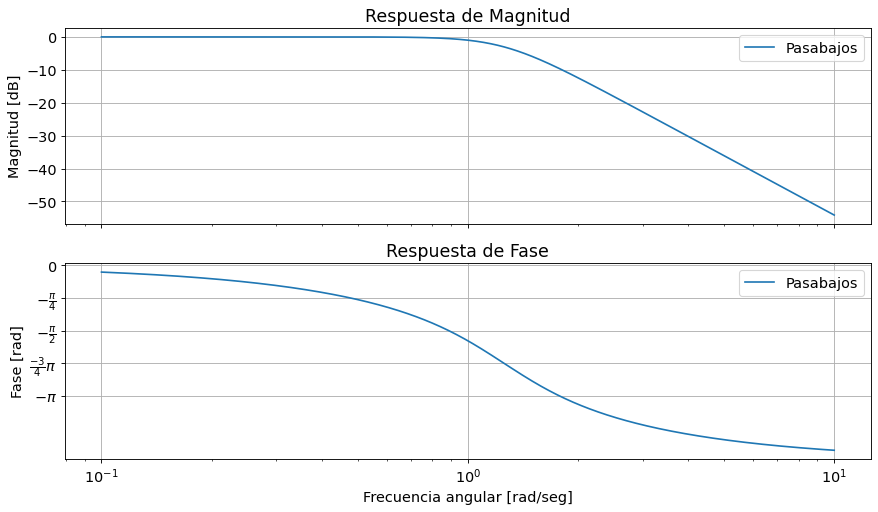

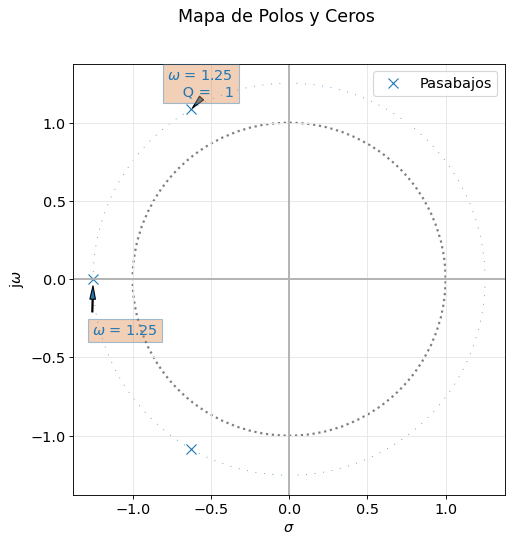

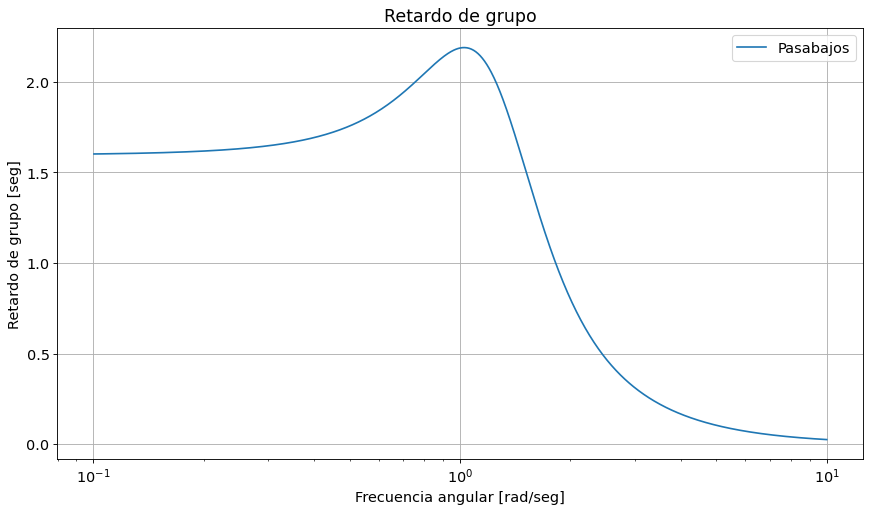

In [2]:
# Módulos externos

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

# módulo de SciPy
from scipy import signal as sig

# Esta parte de código la agregamos SOLO en los notebooks para fijar el estilo de los gráficos.
fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 13

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

from pytc2.sistemas_lineales import analyze_sys, bodePlot, pzmap, pretty_print_bicuad_omegayq
from pytc2.general import print_latex, a_equal_b_latex_s

num = np.array([0,0,1.965])
den = np.array([1,2.505,3.138,1.965])
    
H1 = sig.TransferFunction(num, den)
display(H1)
#print_latex(a_equal_b_latex_s('H_d(s)', pretty_print_bicuad_omegayq(num,den,displaystr=False)))
_ = analyze_sys([H1],sys_name = 'Pasabajos')

El filtro tiene cierto parecido a un *filtro de Butterworth* pero las diferencias que presentan permiten diferenciarlo de uno. La principal diferencia es la ubicacion de los polos en el diagrama ya que el radio de los musmos no es unitario.

### Punto 5

<img src="TS3_3.jpg" width="500">

<img src="TS3_4.jpg" width="500">

Con lo resuelto se llega a un *Filtro Pasa Bajos de Orden 3* con una ganancia $K=\frac{1}{R1}$

Para sinmplificar el diseño, se utilizo una *gm* en comun al igual que para los capacitores *C* y se tomo como norma de impedancia que $R = 1 \ohm$ y asi la ganancia sera $K=1$

<img src="TS3_5.jpg" width="500">

La manera que elegi para elegir sus componentes fue dividir en filtro en dos etapas y asi poder identificar los grados de libertad de cada etapa. Como explico al final, dejo solo 1 grado de libertad *gm*, el cual solo afecta a la 1ra etapa.